In [190]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score, recall_score, precision_score, confusion_matrix

In [104]:
cc_fraud_raw = pd.read_csv('creditcard.csv')

In [3]:
cc_fraud_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
cc_fraud_raw.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
cc_fraud_raw.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


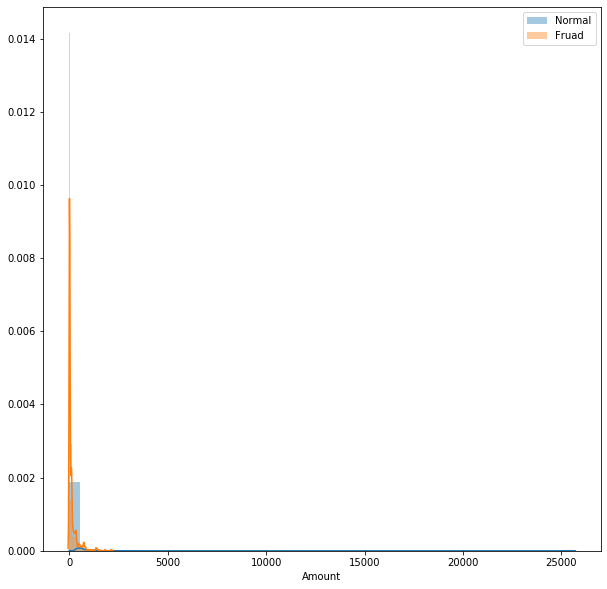

In [6]:
plt.figure(figsize=(10,10))
sns.distplot(cc_fraud_raw[cc_fraud_raw['Class']==0]['Amount'],label='Normal')
sns.distplot(cc_fraud_raw[cc_fraud_raw['Class']==1]['Amount'],label='Fruad')
plt.legend()

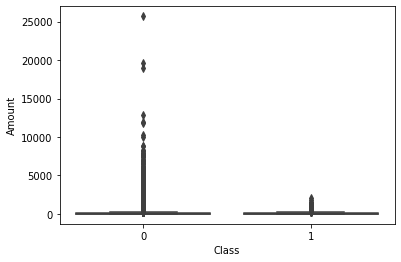

In [7]:
sns.boxplot(x=cc_fraud_raw['Class'],y=cc_fraud_raw['Amount'])

In [25]:
X = cc_fraud_raw.drop('Class',axis=1)
y = cc_fraud_raw['Class']

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1,stratify=y)

In [68]:
rfc = RandomForestClassifier(n_estimators=15,max_depth=5)

In [69]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
f1_score(y_test,rfc.predict(X_test))

0.8793103448275862

In [71]:
y_score_rf = rfc.predict_proba(X_test)[:,-1]

In [72]:
precision, recall, _ = precision_recall_curve(y_test, y_score_rf)
average_precision = average_precision_score(y_test, y_score_rf)

Text(0.5, 1.0, 'Precision-Recall Curve with Avg Prec = 0.8861350158521949')

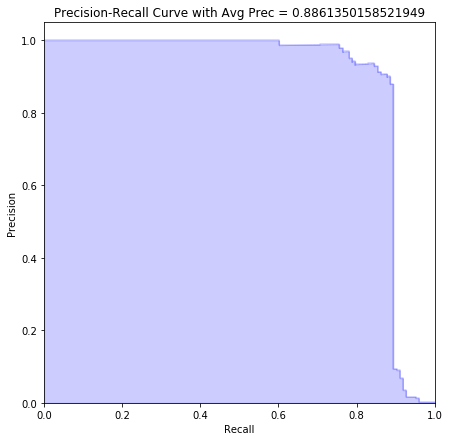

In [75]:
plt.figure(figsize=(7,7))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve with Avg Prec = '+str(average_precision))

In [172]:
recall_score(y_test,rfc.predict(X_test))

0.8292682926829268

In [78]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print('F1 score = ',f1_score(y_test,rfc.predict(X_test)))
y_score_lr = lr.predict_proba(X_test)[:,-1]
precision, recall, _ = precision_recall_curve(y_test, y_score_lr)
average_precision = average_precision_score(y_test, y_score_lr)

C:\Users\georg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1 score =  0.8793103448275862


Text(0.5, 1.0, 'Precision-Recall Curve for LR with Avg Prec = 0.6831780821602719')

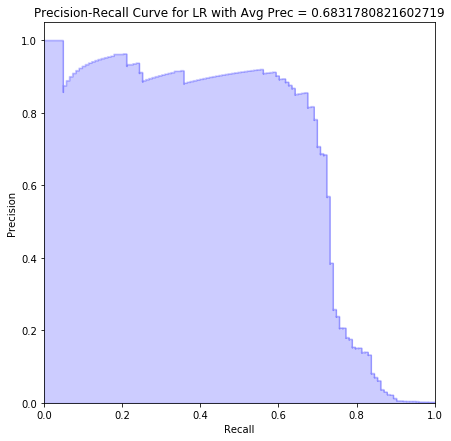

In [79]:
plt.figure(figsize=(7,7))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for LR with Avg Prec = '+str(average_precision))

In [80]:
#try to upsample fraud class to better balance out data
cc_fraud_raw.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [156]:
cc_fraud_upsample = pd.concat([X_train,y_train],axis=1)

In [157]:
print(len(cc_fraud_upsample[cc_fraud_raw['Class']==0]),len(cc_fraud_upsample[cc_fraud_raw['Class']==1]))

213236 369


C:\Users\georg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [158]:
fraud_upsample = np.random.choice(cc_fraud_upsample[cc_fraud_upsample['Class']==1].index.values,size=213236)

In [159]:
cc_fraud_upsample.drop(index=cc_fraud_upsample[cc_fraud_upsample['Class']==1].index,inplace=True)

In [160]:
cc_fraud_upsample=cc_fraud_upsample.append(cc_fraud_raw.iloc[fraud_upsample])

In [164]:
X_up = cc_fraud_upsample.drop('Class',axis=1)
y_up = cc_fraud_upsample['Class']

In [167]:
rfc_up = RandomForestClassifier(n_estimators=15,max_depth=5)
rfc_up.fit(X_up,y_up)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [168]:
f1_score(y_test,rfc_up.predict(X_test))

0.4014336917562724

In [169]:
y_score_rf_up = rfc_up.predict_proba(X_test)[:,-1]
precision, recall, _ = precision_recall_curve(y_test, y_score_rf_up)
average_precision = average_precision_score(y_test, y_score_rf_up)

Text(0.5, 1.0, 'Precision-Recall Curve for Upsampled with Avg Prec = 0.781693057993306')

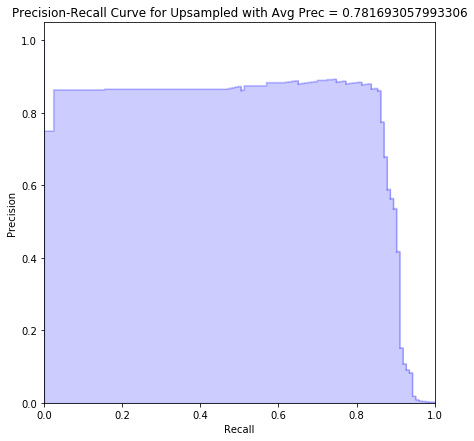

In [170]:
plt.figure(figsize=(7,7))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for Upsampled with Avg Prec = '+str(average_precision))

In [173]:
recall_score(y_test,rfc_up.predict(X_test))

0.9105691056910569

Recall increases with the upsampled set.  If we want to optimize for recall, this is the model we should use.  Why optimize for recall?  If getting false-negatives is unacceptable, we want to optimize for recall.  For example, if this model was used for flagging potential fraud transactions, we would want to optimize for recall.  This is because it would be better to alert the company of potential fraud (so that it can act on it) even if it may be a false-positive.  Letting fraudulent transactions through would be more costly, then accidentally flagging legitimate transactions.

In [194]:
#optimize hyperparameters using GridSearchCV
tuned_parameters = {'n_estimators':[40],
                    'max_depth':[5,10,20]}
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5,
                       scoring='recall')
clf.fit(X_up_train, y_up_train)
print(clf.best_params_)

{'max_depth': 20, 'n_estimators': 40}


In [195]:
recall_score(y_test,clf.predict(X_test))

1.0

In [196]:
f1_score(y_test,clf.predict(X_test))

0.9647058823529412

In [197]:
precision_score(y_test,clf.predict(X_test))

0.9318181818181818

In [198]:
y_score_clf = clf.predict_proba(X_test)[:,-1]
precision, recall, _ = precision_recall_curve(y_test, y_score_clf)
average_precision = average_precision_score(y_test, y_score_clf)

Text(0.5, 1.0, 'Precision-Recall Curve for Upsampled with Avg Prec = 1.0000000000000002')

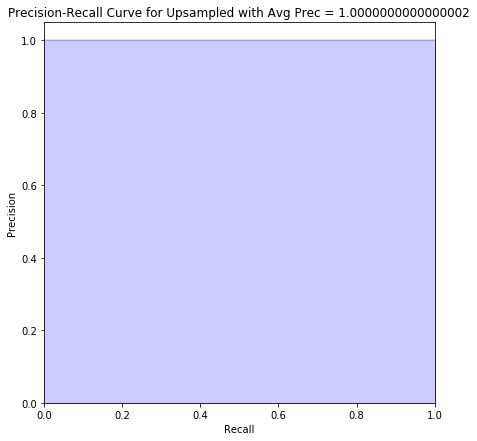

In [199]:
plt.figure(figsize=(7,7))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for Upsampled with Avg Prec = '+str(average_precision))

In [203]:
confusion_matrix(y_test,clf.predict(X_test),labels=[0,1])

array([[71070,     9],
       [    0,   123]], dtype=int64)

In [201]:
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.93      1.00      0.96       123

    accuracy                           1.00     71202
   macro avg       0.97      1.00      0.98     71202
weighted avg       1.00      1.00      1.00     71202



In [202]:
9/123

0.07317073170731707